# Charting a Marketing Acquisition Funnel
> The motiviation was duplicating some of Looker's bar charts when the data itself was still a bunch of CSV files, MySQL queries, and a bunch of API calls glued together

- toc: false
- branch: master
- badges: true
- categories: [viz, jupyter]
- hide: false
- search_exclude: false

In [1]:
%matplotlib inline

import pandas as pd
from collections import OrderedDict
import matplotlib.pyplot as plt
import matplotlib.patches as patches

import seaborn as sns
sns.set_style('whitegrid')

In [2]:
# start with some dummy data
df = pd.DataFrame({
    'date':['2019-08-01','2019-09-01'],
    'website_traffic':[530771,558652],
    'new_accounts':[15720,15900],
    'account_verify':[12670,13884],
    'product_activated':[10812,12909],
    'paid_conversion':[654,908],
    'some_other_metric':[13270,13678]
})
df

date  website_traffic  new_accounts  account_verify  \
0  2019-08-01           530771         15720           12670   
1  2019-09-01           558652         15900           13884   

   product_activated  paid_conversion  some_other_metric  
0              10812              654              13270  
1              12909              908              13678

In [3]:
df['date'] = pd.to_datetime(df['date'],format='%Y-%m-%d')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   date               2 non-null      datetime64[ns]
 1   website_traffic    2 non-null      int64         
 2   new_accounts       2 non-null      int64         
 3   account_verify     2 non-null      int64         
 4   product_activated  2 non-null      int64         
 5   paid_conversion    2 non-null      int64         
 6   some_other_metric  2 non-null      int64         
dtypes: datetime64[ns](1), int64(6)
memory usage: 240.0 bytes


In [5]:
# define only the KPIs we want to see (since there are cases where other metrics are present in the dataframe)
all_kpis = ['website_traffic','new_accounts','account_verify','product_activated','paid_conversion']

In [6]:
all_names = tuple([x.replace('_','\n').title() for x in all_kpis])

In [11]:
def get_it_in_order(df,mask,month):
    """
    Biggest assumption: there is a 'date' column (not index!) in the dataframe that is *literally named* 'date'
    Accepts entire dataframe
    Supply a column mask
    Supply a list of column names
    """
    kpis = OrderedDict()
    frame_2_dict = df.set_index('date').loc[month,mask].to_dict()
    for i in mask:
        kpis[i] = frame_2_dict[i]
    return kpis

In [8]:
def add_arrow(x_adjust,y_adjust,ratio):
    bbox_props = dict(boxstyle="rarrow,pad=0.5", facecolor="grey", edgecolor="grey", alpha=0.75, lw=1)
    return plt.text(x_adjust,y_adjust,'{0:.1f}%'.format(ratio * 100),
            verticalalignment='center',
            horizontalalignment='left',
            fontsize=16,
            weight='black',
            color='white',
            bbox=bbox_props)

In [9]:
def plot_acquisition_funnel(df, month, names, metrics):
    data = get_it_in_order(df, metrics, month)
    count = range(len(data))
    fig, ax = plt.subplots(figsize=(10, 6))
    rects = ax.bar(count, data.values(), width=.5, align='center', color=sns.color_palette("Blues", len(data)))
    plt.xticks(count, names)
    plt.ylim(bottom=0, top=data[metrics[1]]*2)
    plt.title('{0} Acquisition Funnel'.format(month), fontsize=16)
    plt.tick_params(labelsize=16)
    add_arrow(0.27, data[metrics[3]]/1.7, data[metrics[1]]/data[metrics[0]])
    add_arrow(1.27, data[metrics[3]]/1.7, data[metrics[2]]/data[metrics[1]])
    add_arrow(2.27, data[metrics[3]]/1.7, data[metrics[3]]/data[metrics[2]])
    add_arrow(3.27, data[metrics[3]]/1.7, data[metrics[4]]/data[metrics[3]])
    for rect, val in zip(rects,data.values()):
        height = rect.get_height()
        if height > 250:
            label_color = 'grey'
        else:
            label_color = 'white'
        ax.text(rect.get_x() + rect.get_width()/2,250,'{:,}'.format(val),ha='center', va='bottom',fontsize=12,weight='bold',color=label_color)
    plt.grid(False)
    plt.show()

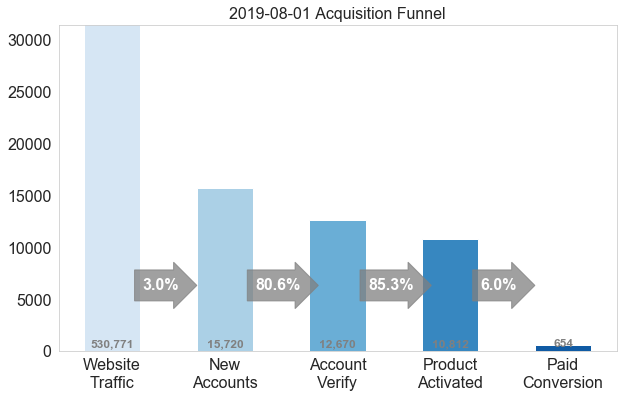

In [12]:
plot_acquisition_funnel(df,'2019-08-01',all_names,all_kpis)